# Giải phẫu cấu trúc Matplotlib 

### BS. Lê Ngọc Khả Nhi

# Giới thiệu 
Matplotlib là thư viện đồ họa thống kê chính trong Python, được thiết kế bởi John D. Hunter cách đây 18 năm (2002) như một giao thức mô phỏng theo ngôn ngữ Matlab. Sau khi Hunter qua đời năm 2012, thư viện tiếp tục được phát triển bởi Michael Droettboom và Thomas Caswell.

Matplotlib là nền tảng về đồ họa trong ngôn ngữ Python, vì hầu hết những API đồ họa thống kê khác trong Python như seaborn, pandas, plotnine, bokeh, holoview, ... đều dựa trên matplotlib.

Tuy không phô bày một cú pháp trong sáng như ggplot2 của R, nhưng matplotlib dễ học hơn nhiều  so với base R graphics, đầy đủ tính năng cho nghiên cứu khoa học và một số loại biểu đồ vẽ bằng matplotlib có phẩm chất mỹ thuật không hề thua kém R.

Matplotlib thực ra rất dễ học, khó khăn chủ yếu khi thực hành là do người dùng bị nhầm lẫn giữa 2 phong cách viết code: (1) sử dụng trực tiếp function và method và (2) tiếp cận theo hướng OOP - gồm subplots, Gridspec và Axes.

Trong bài thực hành này, Nhi sẽ hệ thống lại những yếu tố quan trọng nhất trong cú pháp matplotlib, cho phép thỏa mãn tất cả nhu cầu trong công việc hằng ngày của nghiên cứu sinh.


In [1]:
## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from itertools import product, combinations
import matplotlib.gridspec as plt_gs

Trong bài sử dụng dữ liệu minh họa là iris

In [3]:
path = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'

df = pd.read_csv(path, index_col=0)

df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


# Vòng đời của một figure 

Khi bạn vẽ một tấm hình bằng matplotlib, nó được gọi là figure.

Figure được sinh ra bằng method plt.figure(), trong đó bạn có thể tùy chỉnh nhiều thuộc tính, quan trọng nhất là kích thước figsize như 1 tuple, và độ phân giải dpi. 

Vòng đời của figure chỉ chấm dứt khi bạn trình diễn nó bằng plt.show(), hoặc sao lưu bằng plt.savefig(), kèm hoặc không kèm tắt tính năng display bằng method plt.close().

Một khi figure chưa display hoặc sao lưu, ta có thể tiếp tục vẽ rất nhiều thành phần bên trong nó, sử dụng các hàm đồ họa của matplotlib, hoặc seaborn (method của seaborn tương thích hoàn toàn với pyplot).

Bên trong 1 tấm hình (figure) có thể chứa rất nhiều graphs hay biểu đồ vấn đề là làm sao tổ chức trình bày những graph này theo mục tiêu của người dùng.

In [ ]:
plt.figure() # Figure sinh ra

... # tha hồ vẽ

plt.show() # đóng và trình diễn

In [ ]:
fig_1 = plt.figure() # Tạo object figure mới

...

plt.savefig() # sao lưu figure hiện hành
plt.close(fig_1) # Đóng figure

# Sử dụng trực tiếp hàm đồ họa từ pyplot

Sau khi import module pyplot từ matplotlib với tên viết tắt là plt, người dùng có 2 cách làm việc, hoặc dùng functions/methods trực tiếp từ plt, hoặc khởi tạo những objects (phong cách code OOP).

Cách làm thứ nhất tiện lợi khi bạn chỉ cần tạo 1 graph duy nhất, cấu tạo đơn giản bên trong figure, hoặc chồng lắp những layer cùng bản chất trên một graph duy nhất.

Thí dụ, nếu bạn chỉ cần vẽ 1 scatter_plot đơn, có thể gọi trực tiếp plt.scatter()

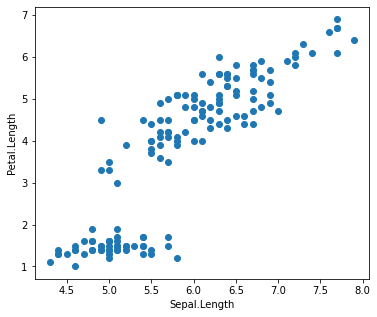

In [18]:
plt.figure(figsize = (6,5))

plt.scatter(df['Sepal.Length'],df['Petal.Length'])
plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')

plt.show()

Mỗi lần dùng 1 hàm đồ họa trực tiếp từ plt, bất kể hàm nào, nó chồng 1 layer lên figure hiện hành, nhưng vẫn nằm trên cùng 1 graph, ta lợi dụng hành vi này để vẽ những biểu đồ có yếu tố phân nhóm nhưng cùng bản chất, thí dụ time series, scatter plot, density plot... bằng vòng lặp for

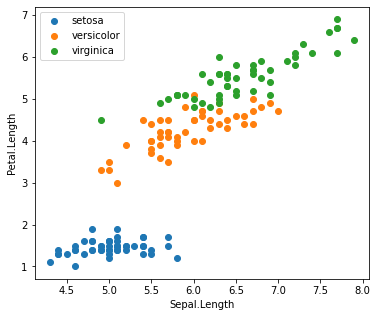

In [21]:
plt.figure(figsize = (6,5))

for i in df['Species'].unique():
    filt_df = df[df['Species'] == i]
    plt.scatter(filt_df['Sepal.Length'],filt_df['Petal.Length'], label = i)

plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')
plt.legend()

plt.show()

vì seaborn cũng chính là matplotlib, nó cũng tuân theo quy tắc này:

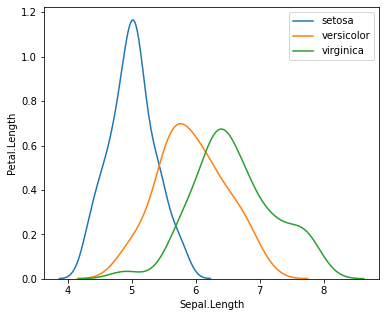

In [5]:
plt.figure(figsize = (6,5))

for i in df['Species'].unique():
    filt_df = df[df['Species'] == i]
    sns.kdeplot(filt_df['Sepal.Length'], label = i)

plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')

plt.show()

Tuy nhiên, một khi bạn quên chưa đóng figure và muốn vẽ 2 graph khác nhau, kết quả có thể rất kì dị, không theo ý muốn:

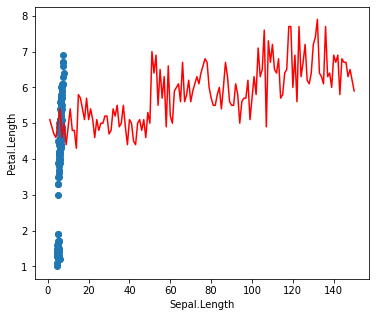

In [11]:
plt.figure(figsize = (6,5))

plt.scatter(df['Sepal.Length'],df['Petal.Length'])

plt.plot(df['Sepal.Length'], 'r')
    
plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')

plt.show()

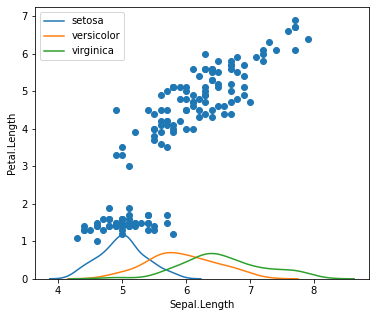

In [12]:
plt.figure(figsize = (6,5))

plt.scatter(df['Sepal.Length'],df['Petal.Length'])

for i in df['Species'].unique():
    filt_df = df[df['Species'] == i]
    sns.kdeplot(filt_df['Sepal.Length'], label = i)
    
plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')

plt.show()

Nếu ta muốn vẽ hàng loạt figure cùng bản chất, có thể đóng figure sau mỗi iteration trong một vòng lặp, bằng cách này bạn vẫn đang sử dụng function và method, chưa cần dùng đến tính năng OOP, và hiệu quả vẫn có thể chấp nhận được:

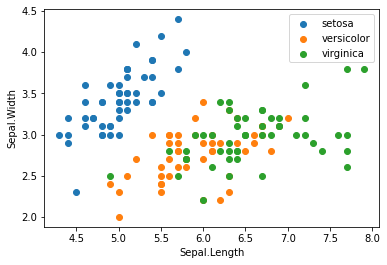

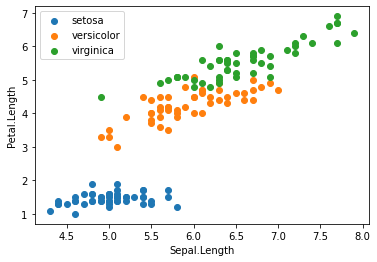

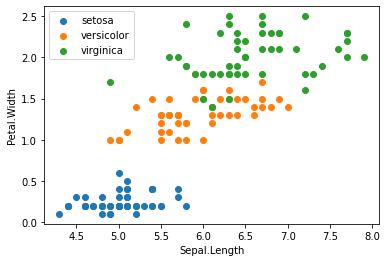

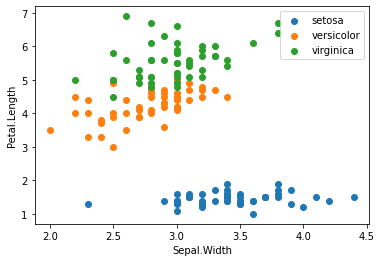

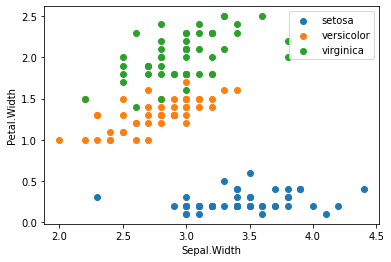

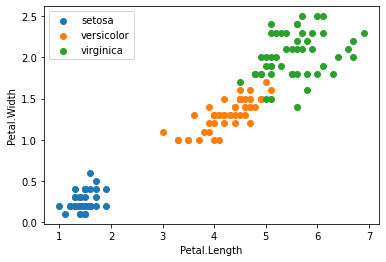

In [36]:
plt.figure()

for i in combinations(df.drop(['Species'], axis = 1).columns, 2):
    for j in df['Species'].unique():
        filt_df = df[df['Species'] == j]
        plt.scatter(filt_df[i[0]], filt_df[i[1]], label = j)
    
    plt.xlabel(i[0])
    plt.ylabel(i[1])
    plt.legend()
    
    plt.show()

## Sử dụng subplot

Lưu ý, trường hợp trên ta có 6 biểu đồ scatter plot nối tiếp nhau, tuy nhiên mỗi biểu đồ chính là 1 figure riêng biệt, và mỗi figure này chỉ chứa 1 graph bên trong, sau khi figure trước được đóng, thì figure mới tiếp theo sinh ra, cho đến figure cuối cùng.

Đó là cách làm thủ công, nhược điểm của nó, đó là bạn sẽ có 6 figure rời rạc, bạn không thể lưu lại hình ảnh trong notebook thành 1 figure duy nhất, mà chỉ có thể lưu 6 files ảnh rời rạc.

Cách làm đúng, đó là trình bày 6 graphs trong 1 figure; sử dụng method plt.subplot()

Thí dụ sau, Nhi tổ chức 1 figure có 4 hàng, 1 cột, trong cùng 1 figure, bằng plt.subplot(411), sau đó + vị trí i của biến cần vẽ kde_plot, như vậy 412 là graph ở vị trí thứ 2 trong figure 4 hàng x 1 cột.

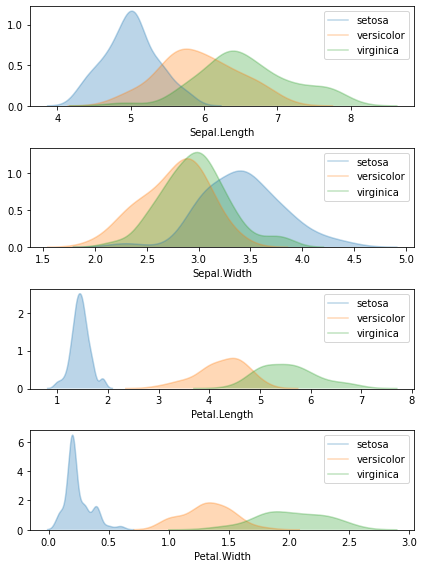

In [122]:
plt.figure(figsize = (6,8))

for i,k in zip(range(4), df.drop(['Species'], axis = 1).columns):
    plt.subplot(411 + i)
    for j in df['Species'].unique():
        filt_df = df[df['Species'] == j]
        sns.kdeplot(filt_df[k], shade = True, alpha = 0.3, label = j)
    plt.xlabel(k)

plt.tight_layout()
plt.show()

Tương tự, 141, 142, 143... là cấu trúc figure có 1 hàng x 4 cột:

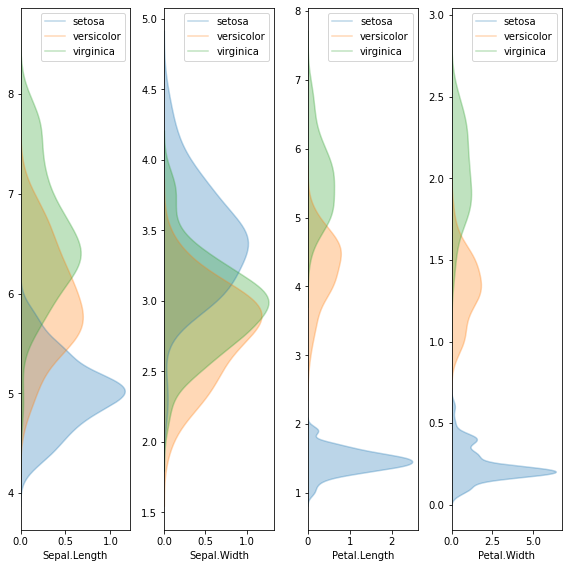

In [14]:
plt.figure(figsize = (8,8))

for i,k in zip(range(4), df.drop(['Species'], axis = 1).columns):
    plt.subplot(141 + i)
    for j in df['Species'].unique():
        filt_df = df[df['Species'] == j]
        sns.kdeplot(filt_df[k], shade = True, alpha = 0.3, label = j, vertical = True)
    plt.xlabel(k)

plt.tight_layout()
plt.show()

# Phong cách OOP

Bây giờ, ta sẽ dùng phong cách OOP để tạo ra object figrue và axes là các phân vùng cho graphs

## Sử dụng Subplots

Cách làm thứ nhất để tạo ra figure có cấu trúc phức tạp, đó là dùng plt.subplots, với arguments về số hàng, số cột.

Thí dụ: fig, axes = plt.subplots(3,4, figsize = (6,6)) tạo ra 1 figure có 3 hàng, 4 cột và kích thước figure là 6x6 inches

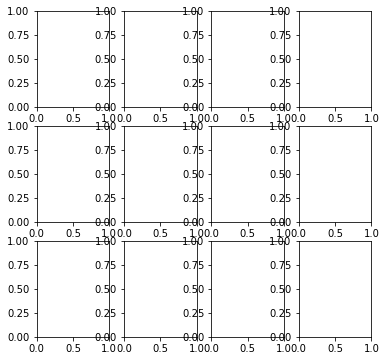

In [27]:
fig, axes = plt.subplots(3,4, figsize = (6,6))

trong đó, axes có bản chất là numpy array, trong thí dụ này là array có shape = 3,4

In [28]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001772A95B760>,
      dtype=object)

In [29]:
axes.shape

(3, 4)

In [32]:
axes[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001772AC46BE0>,
      dtype=object)

Bạn có thể hình dung, axes[0] là hàng thứ nhất, axes[2] là hàng thứ 3...

In [33]:
axes[0][1] # hàng thứ nhất, cột thứ 2

Trong thí dụ sau, ta xếp 6 scatter plot vào một ma trận 3 hàng, 2 cột, sử dụng thủ thuật axes.flatten() để biến numpy array 2 chiều thành 1 chiều.

Cách làm này chỉ dùng khi cả 6 biểu đồ có cùng bản chất (vẽ ra bởi cùng 1 hàm).

Thí dụ bạn muốn vẽ kde plot cho hàng loạt biến, đây là cách phù hợp nhất

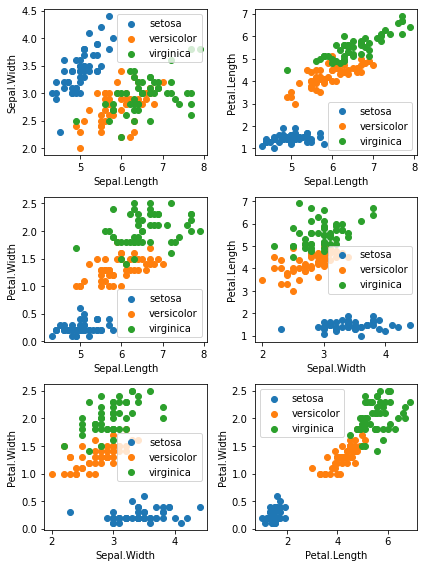

In [66]:
fig, axes = plt.subplots(3,2, figsize = (6,8))

for i,ax in zip(combinations(df.drop(['Species'], axis = 1).columns, 2),
               axes.flatten()):
    
    for j in df['Species'].unique():
        filt_df = df[df['Species'] == j]
        ax.scatter(filt_df[i[0]], filt_df[i[1]], label = j)
        ax.set_xlabel(i[0])
        ax.set_ylabel(i[1])
        
        ax.legend()

plt.tight_layout()
plt.show()

Trong trường hợp bạn muốn vẽ nhiều loại biểu đồ bằng nhiều hàm khác nhau, và xếp mỗi loại vào cùng 1 cột, cũng có thể dùng axes và vòng lặp:

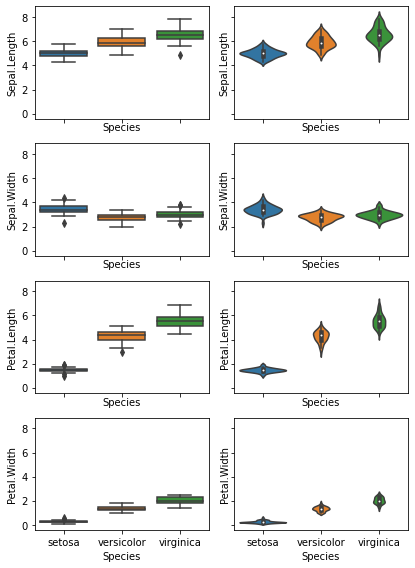

In [107]:
fig, axes = plt.subplots(4,2, figsize = (6,8), sharex=True, sharey = True)
    
for i,ax,target in zip(range(4), axes, df.drop(['Species'], axis = 1).columns):  
    sns.boxplot(data = df, x = 'Species', y = target, ax = ax[0])
    sns.violinplot(data = df, x = 'Species', y = target, ax = ax[1])
    
plt.tight_layout()
plt.show()

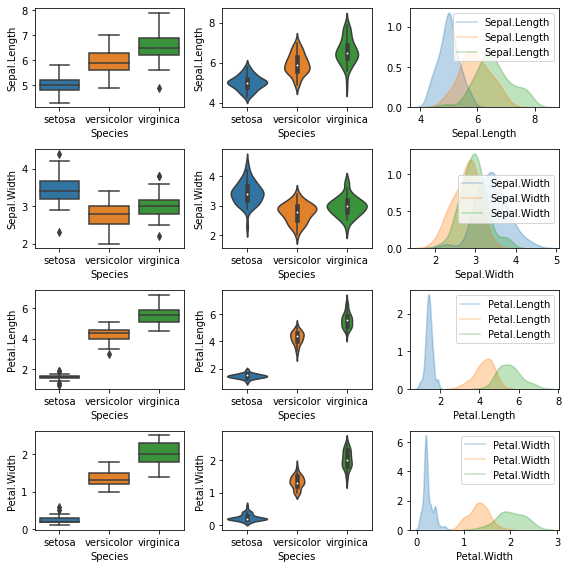

In [111]:
fig, axes = plt.subplots(4,3, figsize = (8,8), sharex=False, sharey = False)
    
for i,ax,target in zip(range(4), axes, df.drop(['Species'], axis = 1).columns):  
    sns.boxplot(data = df, x = 'Species', y = target, ax = ax[0])
    sns.violinplot(data = df, x = 'Species', y = target, ax = ax[1])
    
    for j in df['Species'].unique():
        filt_df = df[df['Species'] == j]
        sns.kdeplot(filt_df[target], ax = ax[2], shade = True, alpha = 0.3)
    
    ax[2].set_xlabel(target)
    
plt.tight_layout()
plt.show()

## Gridspec

Subplots chí thích hợp cho những quy trình đơn giản (các graph theo 1 pattern nào đó, tỉ lệ diện tích như nhau...), nhưng không dùng được khi bạn cần vẽ 1 figure phức tạp, thí dụ ghép 2 density plot vào trục hoành/tung của 1 scatter plot.

Lúc này, ta dùng Gridspec, phương pháp này chia figure ra thành một lưới nhiều ô có tọa độ hàng và cột như 1 numpy array. 

Tiếp theo, ta dùng subplot để tạo ra các axes có tọa độ và diện tích khác nhau, tùy ý, miễn là vẫn nằm trong phạm vi lưới tọa độ của gridspec.

Kết quả như sau:

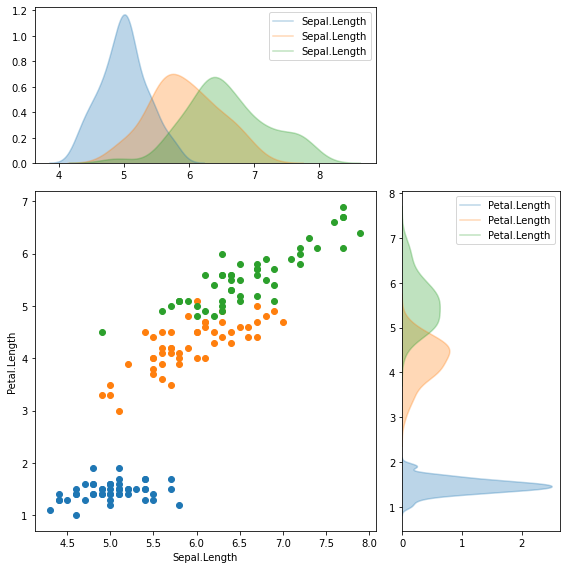

In [141]:
fig = plt.figure(figsize = (8,8))

gs = plt_gs.GridSpec(3,3)
ax1 = plt.subplot(gs[0,:-1])
ax2 = plt.subplot(gs[1:,:-1])
ax3 = plt.subplot(gs[1:,-1])

for j in df['Species'].unique():
    filt_df = df[df['Species'] == j]
    sns.kdeplot(filt_df['Sepal.Length'], ax = ax1, shade = True, alpha = 0.3)
    sns.kdeplot(filt_df['Petal.Length'], ax = ax3, vertical = True, shade = True, alpha = 0.3)
    ax2.scatter(filt_df['Sepal.Length'], filt_df['Petal.Length'], label = j)

ax2.set_xlabel('Sepal.Length')
ax2.set_ylabel('Petal.Length')

plt.tight_layout()
plt.show()

Gridspec có thể tạo figure có cấu trúc tương đối phức tạp, tuy nhiên vẫn còn nhược điểm là không cho phép tinh chỉnh kích thước, tọa độ những axes bên trong theo ý thích, mà chỉ có thể đặt cứng nhắc vào 1 vùng nào đó, giống như xếp đồ vào từng ngăn trong chiếc hộp.

Do đó gridspec thích hợp cho những hình vẽ có cấu trúc nhiều graphs riêng biệt, không chồng lắp lên nhau, canh hàng hoặc cột thẳng, đều. 


## Sử dụng Axes

Một tính năng cao cấp hơn, đó là Axes, nó cho phép tự do tạo ra axes với kích thước tùy thích, đặt ở bất cứ vị trí nào bạn muốn, miễn là nó vẫn nằm trong giới hạn của figure.

Mỗi axis được tạo ra như 1 hình chữ nhật với 4 thuộc tính (left, bottom, width, height), left là khoảng cách tính từ lề bên trái của figure, bottom là khoảng cách tính từ đáy figure, width và height là chiều rộng và chiều cao; tất cả tính bằng tỉ lệ từ 0-1 so với kích thước của figure. 

Ta có thể dùng axes để vẽ ra những figure ô cùng phức tạp, thí dụ như sau: 

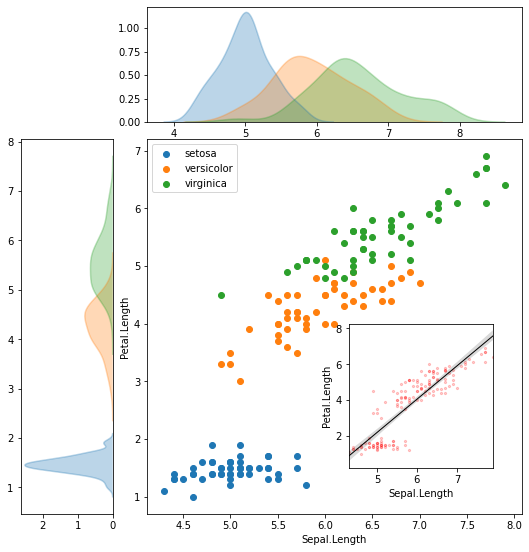

In [210]:
plt.figure(1, figsize=(8, 8))

left, bottom = 0.01, 0.1
w_kde = h_kde = 0.2
left_h = left + w_kde + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_y = [left, bottom, w_kde-0.04, height]
rect_main = [left_h, bottom, width, height]
rect_x = [left_h, bottom_h + 0.01, width, h_kde]

ax_main = plt.axes(rect_main)
ax_x = plt.axes(rect_x)
ax_y = plt.axes(rect_y)
ax_reg = plt.axes([left_h + 0.35, bottom + 0.08, 0.25, 0.25])

for j in df['Species'].unique():
    filt_df = df[df['Species'] == j]
    sns.kdeplot(filt_df['Sepal.Length'], ax = ax_x, shade = True, alpha = 0.3)
    sns.kdeplot(filt_df['Petal.Length'], ax = ax_y, vertical = True, shade = True, alpha = 0.3)
    ax_main.scatter(filt_df['Sepal.Length'], filt_df['Petal.Length'], label = j)
    
sns.regplot(data = df, 
            x = 'Sepal.Length', 
            y = 'Petal.Length', 
            ax = ax_reg, 
            scatter_kws={'alpha':0.2,'color':'red','s': 5},
            line_kws={'color': 'black', 'lw':1})

ax_main.set_xlabel('Sepal.Length')
ax_main.set_ylabel('Petal.Length')
ax_y.invert_xaxis()
ax_y.legend().remove()
ax_x.legend().remove()
ax_main.legend()


plt.tight_layout()

# Tổng kết

1) Figure là hình vẽ tổng thể, bên trong figure chứa 1 hay nhiều graphs

2) Method seaborn cũng chính là matplotlib, khi không xác định ax, hàm seaborn tương đương sử dụng hàm ptt trực tiếp, và chồng lên graph hiện hành, khi xác định ax, seaborn method cho phép gán graph mới vào axis tùy chọn.

3) Không bắt buộc dùng OOP, chỉ cần dùng hàm pyplot trực tiếp, hoặc subplot rời rạc là đủ cho hơn 90% nhu cầu công việc.

4) Có 3 cấp độ tùy chỉnh cấu trúc figure bằng OOP: đơn giản nhất là subplots, cao hơn là gridspec, và tinh tế nhất là Axes.

5) Sử dụng subplots khi cần vẽ hàng loạt hình cùng bản chất, có kích thước như nhau

6) Sử dụng gridspec để vẽ những graphs có kích thước khác nhau nhưng tách biệt, canh thẳng hàng/cột, không chồng lắp và số lượng giới hạn.

7) Sử dụng Axes để vẽ những graphs tự do về tọa độ và kích thước, có thể chồng lên nhau.